In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('income.csv')

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


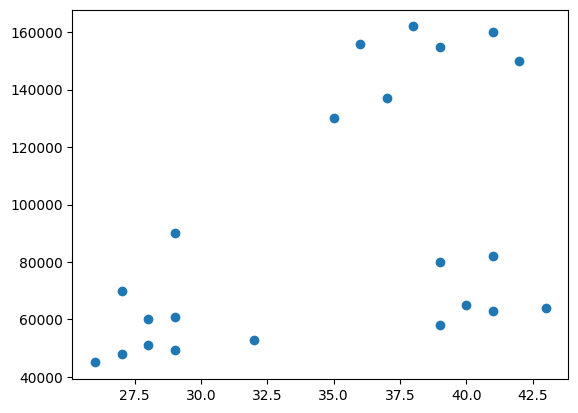

In [22]:
plt.scatter(df['Age'], df['Income($)'])

In [31]:
# create k-means model
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [32]:
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [33]:
df['Cluster'] = y_predicted
df

,Name,Age,Income($),Cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1


C:\Users\wq\AppData\Local\Temp\ipykernel_12888\385394644.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


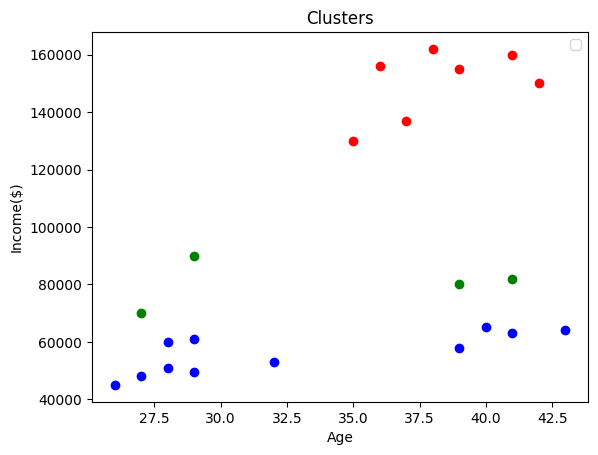

In [34]:
# visualize final clusters
df1 = df[df['Cluster']==0]
df2 = df[df['Cluster']==1]
df3 = df[df['Cluster']==2]

plt.scatter(df1['Age'], df1['Income($)'], color='green')
plt.scatter(df2['Age'], df2['Income($)'], color='red')
plt.scatter(df3['Age'], df3['Income($)'], color='blue')

plt.title('Clusters')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

The cluesters are not correct because of scales

In [38]:
# use minmax scaler
ms = MinMaxScaler()
df['Income($)'] = ms.fit_transform(df[['Income($)']])
df['Age'] = ms.fit_transform(df[['Age']])
df

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [39]:
# create k-means model again
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
df['Cluster'] = y_predicted

In [43]:
# get the centroids
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

C:\Users\wq\AppData\Local\Temp\ipykernel_12888\2677631423.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


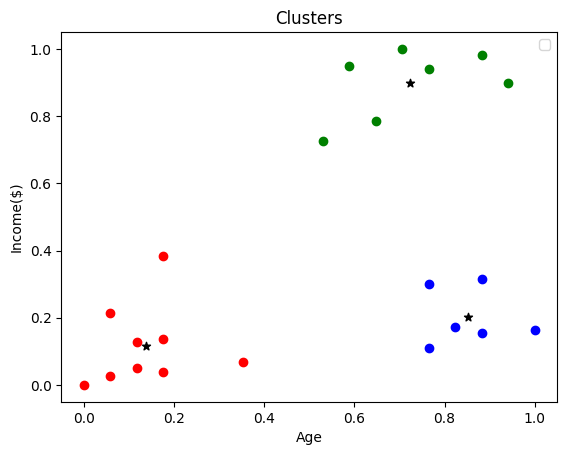

In [46]:
# visualize final clusters again
df1 = df[df['Cluster']==0]
df2 = df[df['Cluster']==1]
df3 = df[df['Cluster']==2]

plt.scatter(df1['Age'], df1['Income($)'], color='green')
plt.scatter(df2['Age'], df2['Income($)'], color='red')
plt.scatter(df3['Age'], df3['Income($)'], color='blue')

# show centroids
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], marker='*',color='black')

plt.title('Clusters')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

Use Elbow method (SSE(Sum of Square Error))

In [48]:
k_rng = range(1, 10)
sse = []

for k in k_rng:
  km = KMeans(n_clusters=k)
  km.fit(df[['Age', 'Income($)']])
  sse.append(km.inertia_)

sse

[5.434011511988176,
 2.457133535904635,
 0.47507834985530945,
 0.4036555119570529,
 0.2963623258321303,
 0.22020960864009398,
 0.19976267209302584,
 0.17378050841973747,
 0.10938598377046611]

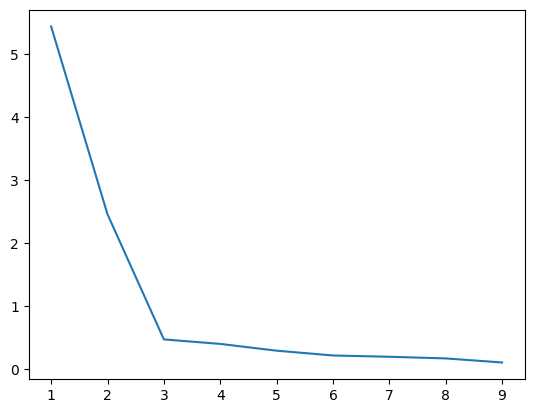

In [50]:
# visualize the elbow plot
plt.plot(k_rng, sse)
# so the best k is 3